Виконавець: Кузь Володимир Вячеславович

Група: К-12

Варіант: 82

Керівник: Веклич Ростислав Анатолійович

In [1]:
import networkx as nx 
import matplotlib.pyplot as plt
import pathlib

In [2]:
NODE = {'font_color': 'black', 'node_color': 'white', 'with_labels': True}
EDGE = {'edgecolors': 'black', 'edge_color': 'black', 'width': 1.5} 

# **Building**

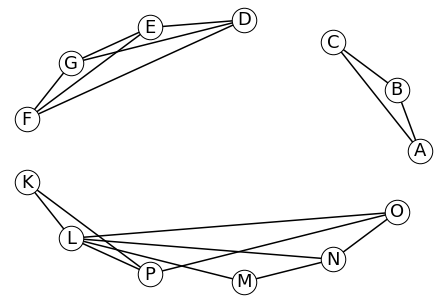

In [3]:
root = pathlib.Path(r'E:\Prog\semestr2')
fname = root.joinpath('g.txt')
Graph = nx.read_adjlist(fname)

nx.draw_circular(Graph, **NODE, **EDGE, font_size= 18, node_size = 600)

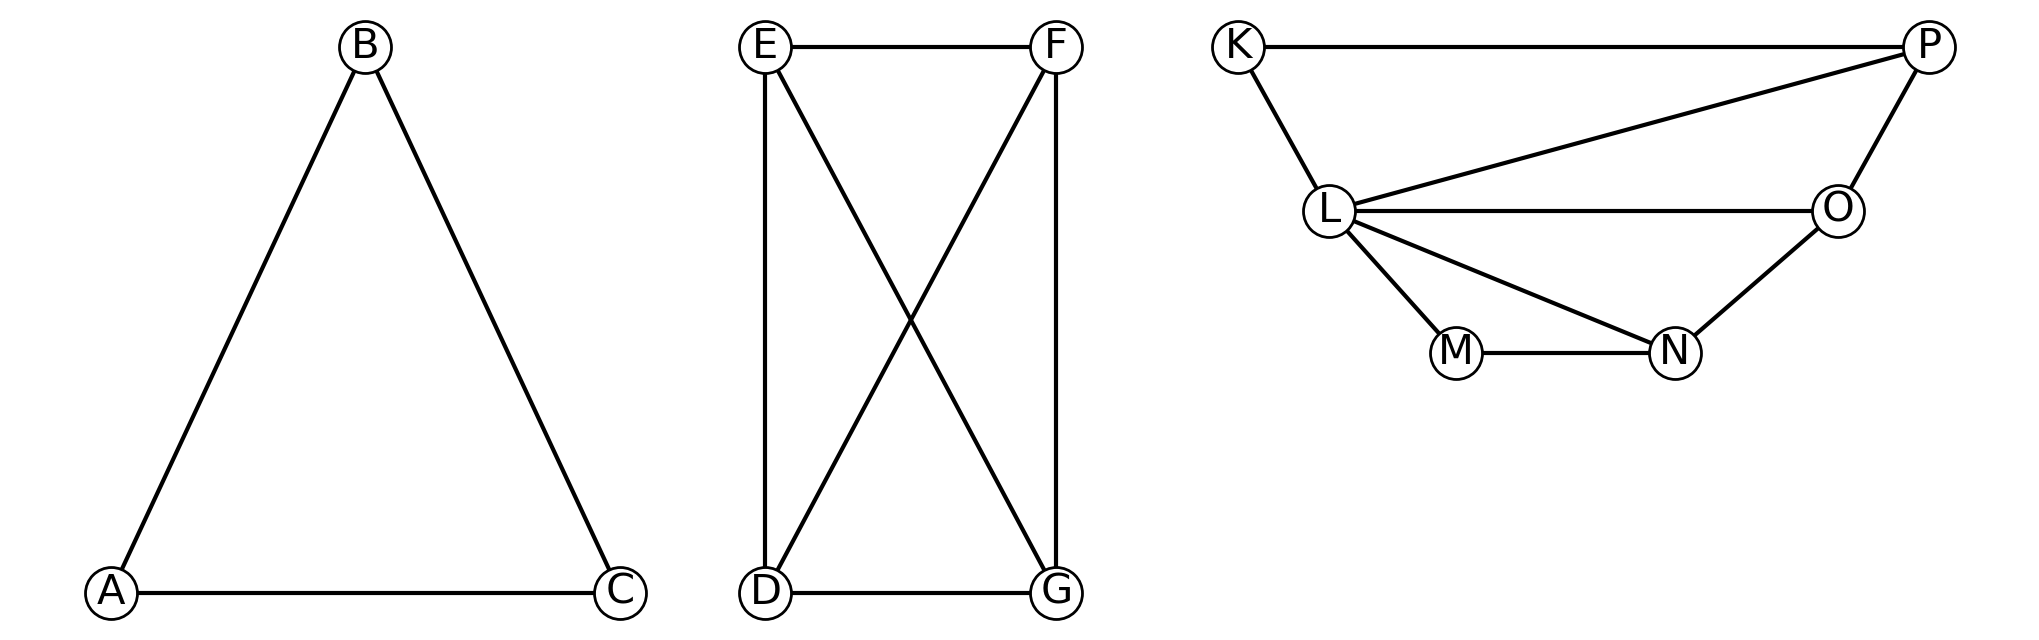

In [4]:
completed_pos = {'A':(0,0), 'B':(0.7,0.5), 'C':(1.4,0),
                 'D':(1.8, 0), 'E':(1.8,0.5), 'F':(2.6,0.5),'G':(2.6,0), 
                 'K':(3.1,0.5), 'L':(3.35,0.35), 'M':(3.7,0.22), 'N':(4.3,0.22), 
                 'O':(4.75,0.35), 'P':(5,0.5)}

plt.figure(figsize=(10, 3), dpi=200)
nx.draw(Graph, pos = completed_pos, **NODE, **EDGE, font_size= 15, node_size = 350)
        

# Graph review

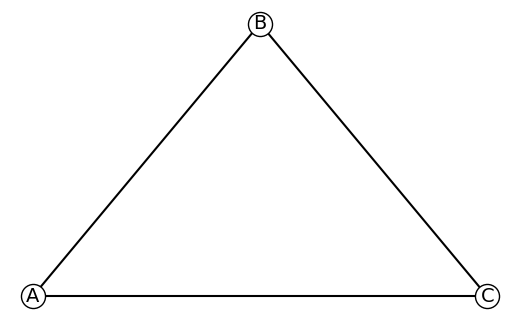

The number of nodes is 3
The number of edges is 3
The degree of A is 2
The degree of B is 2
The degree of C is 2
Eccentricity of A is 1
Eccentricity of B is 1
Eccentricity of C is 1
Radius is  1
Diameter is 1


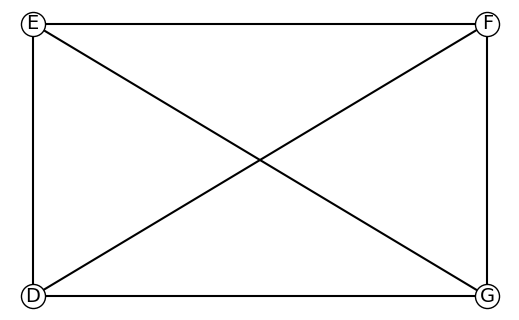

The number of nodes is 4
The number of edges is 6
The degree of D is 3
The degree of E is 3
The degree of F is 3
The degree of G is 3
Eccentricity of D is 1
Eccentricity of E is 1
Eccentricity of F is 1
Eccentricity of G is 1
Radius is  1
Diameter is 1


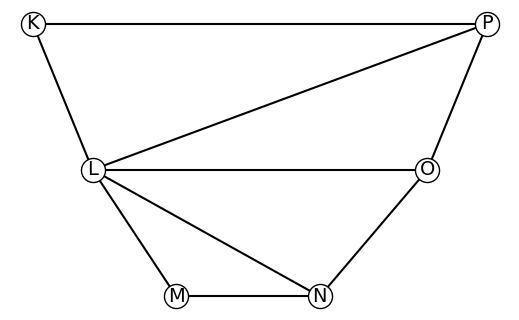

The number of nodes is 6
The number of edges is 9
The degree of K is 2
The degree of L is 5
The degree of M is 2
The degree of N is 3
The degree of O is 3
The degree of P is 3
Eccentricity of K is 2
Eccentricity of L is 1
Eccentricity of M is 2
Eccentricity of N is 2
Eccentricity of O is 2
Eccentricity of P is 2
Radius is  1
Diameter is 2


In [5]:
S = [Graph.subgraph(el) for el in nx.connected_components(Graph)]
for component in S:
    plt.figure(figsize=(5, 3), dpi=100)
    nx.draw(component, pos = completed_pos, **NODE, **EDGE, font_size= 14, node_size = 300)
    plt.show()
    print(f'The number of nodes is {component.number_of_nodes()}')
    print(f'The number of edges is {component.number_of_edges()}')
    for node in sorted(component.nodes()):
        d = component.degree(node)
        print(f'The degree of {node} is {d}')
    
    sort_orders = sorted(nx.eccentricity(component).items(), key=lambda x: x[0])
    for i in sort_orders:
        print('Eccentricity of', i[0], 'is', i[1])
   
    print('Radius is ', nx.radius(component))
    print('Diameter is', nx.diameter(component))

# Search for diameters

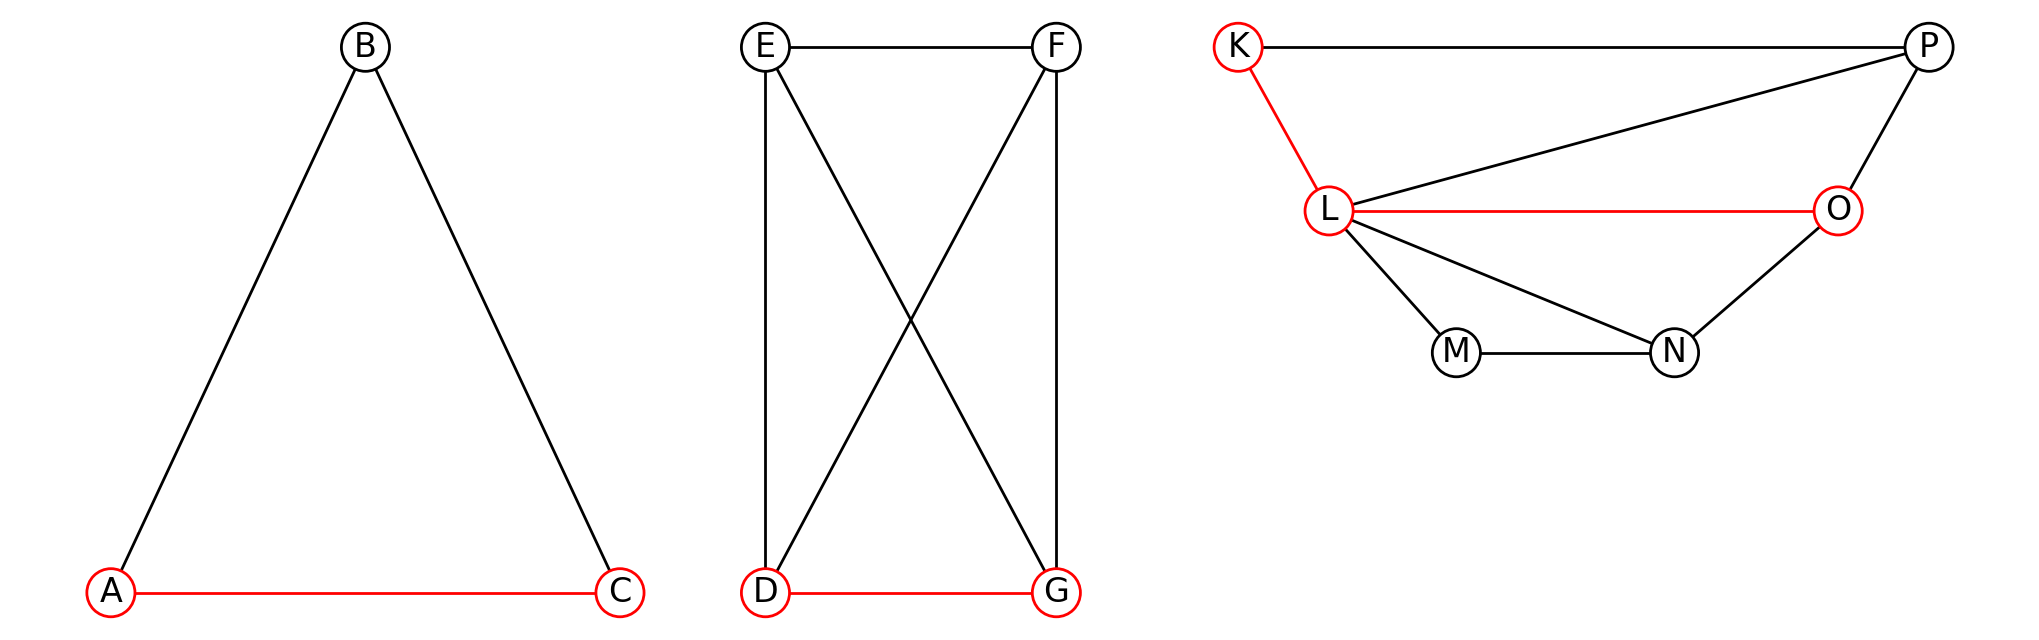

In [8]:
def find_diameter(Graph, start_node):
    paths = nx.shortest_path(Graph, source = start_node)
    farthest_node = list(paths)[0]
    
    for node, path in paths.items():
        if len(paths[node]) > len(paths[farthest_node]):
            farthest_node = node
    return paths[farthest_node] 

plt.figure(figsize=(10, 3), dpi=200)

for el in nx.connected_components(Graph):
    S = Graph.subgraph(el)
    e = nx.eccentricity(S)
    start_node = max(e, key = e.get)
    d_nodes = find_diameter(S, start_node)
    d_edges = [(d_nodes[i], d_nodes[i + 1]) for i in range(len(d_nodes) - 1)]
    nodes_color = ['red' if i in d_nodes else 'black' for i in S.nodes]
    edges_color = ['red' if (v, w) in d_edges or (w, v) in d_edges 
                   else 'black' for v, w in S.edges]

    nx.draw(S, pos=completed_pos, **NODE, edgecolors=nodes_color, edge_color=edges_color)
    


# Search for forest

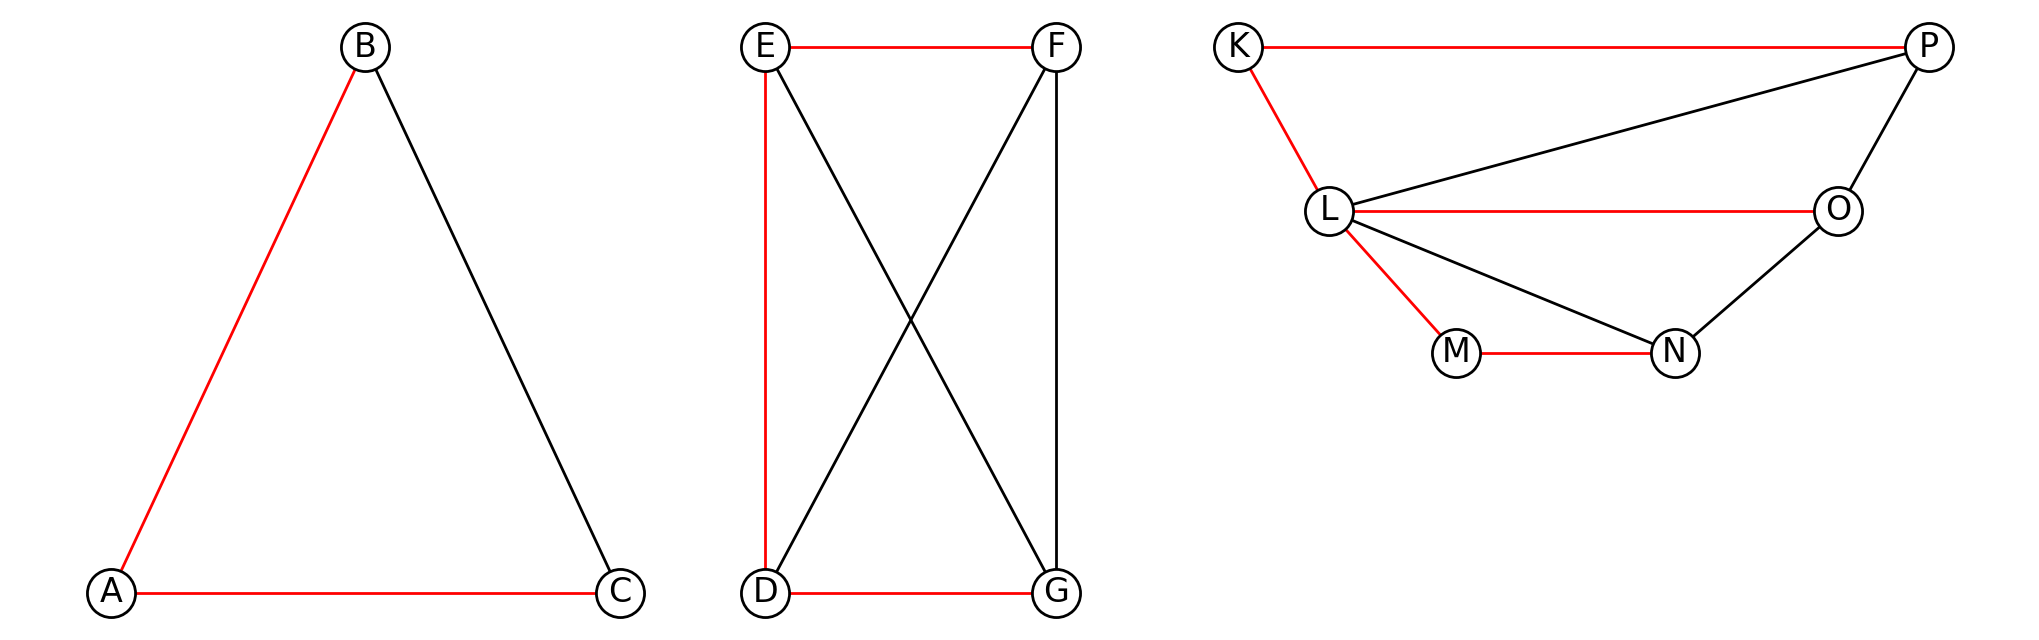

In [7]:
forest_edges = set()

for el in nx.connected_components(Graph):
    S = Graph.subgraph(el) 
    start_node = list(S.nodes)[0]
    tree_edges = nx.dfs_tree(S, source=start_node).edges()
    forest_edges.update(tree_edges)
    
forest_edge_colors = ["red" if (v, w) in forest_edges or (w, v) in forest_edges 
                    else "black" for v, w in Graph.edges]

plt.figure(figsize=(10, 3), dpi=200)
nx.draw(Graph, pos=completed_pos, **NODE, edgecolors="black", edge_color=forest_edge_colors)